# Population and samples in statistics

## Libraries and settings

In [3]:
# Libraries
import os
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## Chickens on a chicken farm (simulated data)

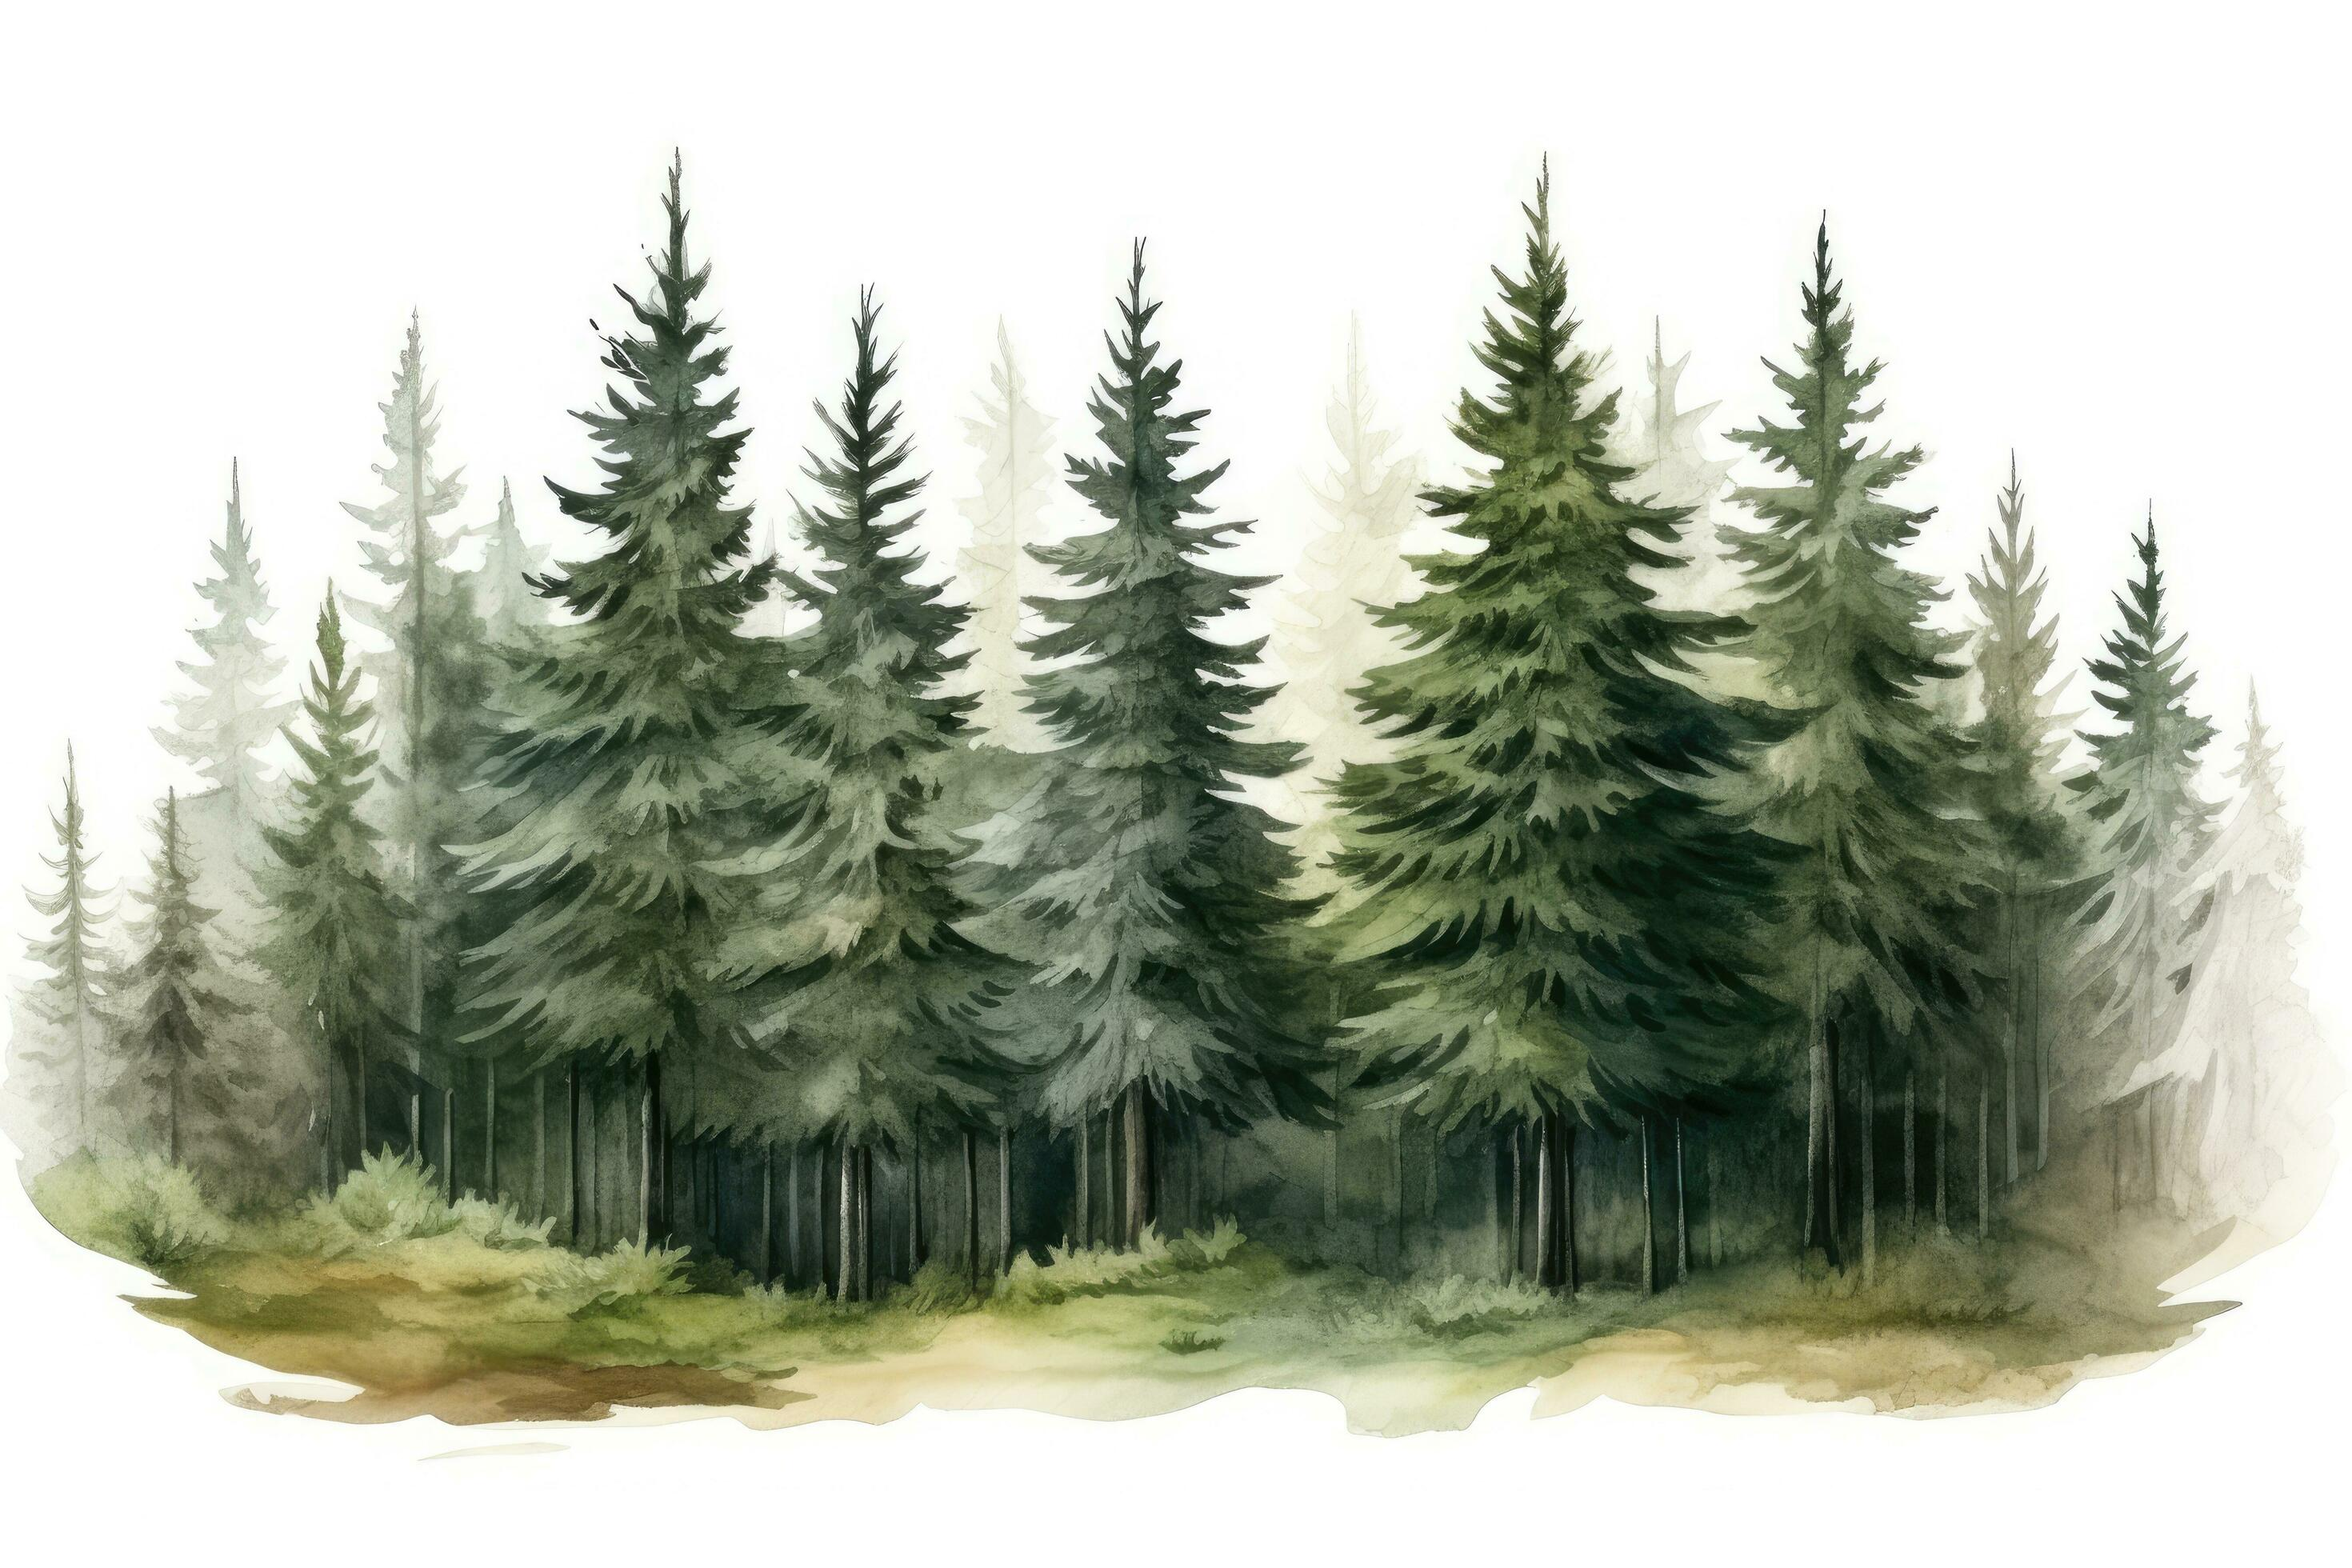

In [20]:
Image("trees.jpg", width=800)

Number of areas simulated: 30000
Average number of trees per km²: 999,026
Standard deviation of trees per km²: 200,576


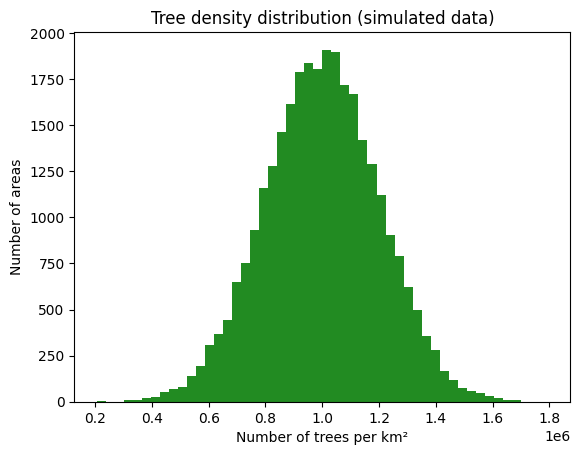

In [15]:
# Parameters of distribution
p_mean = 1000000  # Durchschnittliche Anzahl von Bäumen pro Quadratkilometer (1 Million)
p_std = 200000    # Standardabweichung der Anzahl von Bäumen (200.000)
p_n = 30000       # Anzahl der simulierten Quadratkilometer

# Setting a seed to restore the random numbers later
random.seed(42)

# Generate (normally distributed) data with mean = 1 million trees and standard deviation = 200,000
pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

# Clip negative values to 0 (Baumanzahl kann nicht negativ sein)
pop = np.clip(pop, 0, None)

print(f'Number of areas simulated: {len(pop):.0f}')
print(f'Average number of trees per km²: {np.mean(pop):,.0f}')
print(f'Standard deviation of trees per km²: {np.std(pop):,.0f}')

# Plot histogram based on the data
plt.hist(pop, bins=50, color='forestgreen')
plt.title('Tree density distribution (simulated data)')
plt.xlabel('Number of trees per km²')
plt.ylabel('Number of areas')

plt.show()


## Single random sample from the population

Bootstrap mean of sample means: 998,900
Bootstrap mean of sample standard deviations: 198,377


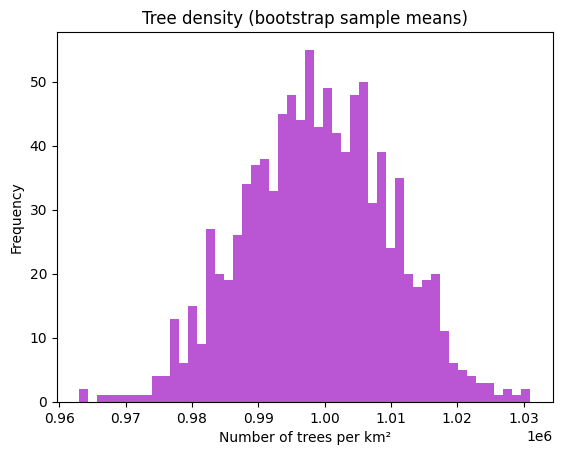

In [18]:
def bootstrap(p_mean= 1000000, p_std= 200000, num_iter=5000, sample_size=200):
    """
    Creates bootstrap samples from a distribution representing tree density in a forest.

    :param p_mean: Population mean tree density (trees/km²). Type = int, float
    :param p_std: Population standard deviation of tree density. Type = int, float
    :param num_iter: Number of bootstrap iterations. Type = int
    :param sample_size: Size of a single bootstrap sample. Type = int
    :return: Histogram of bootstrap sample means.
    """

    # Setting a seed to restore the random numbers later
    random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=30000)  # Larger population to simulate a realistic forest

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std = []

    # Loop for bootstrap iterations
    for i in range(num_iter):
        samp = random.sample(pop.tolist(), sample_size)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and standard deviation of the bootstrapped distribution
    print(f'Bootstrap mean of sample means: {np.mean(sample_mean):,.0f}')
    print(f'Bootstrap mean of sample standard deviations: {np.mean(sample_std):,.0f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins=50, color='mediumorchid')
    plt.title('Tree density (bootstrap sample means)', fontsize=12)
    plt.xlabel('Number of trees per km²')
    plt.ylabel('Frequency')
    plt.show()

# Function call
bootstrap(p_mean=1000000, p_std=200000, num_iter=1000, sample_size=350)


## Repeated random sampling 'with replacement' (bootstrapping)

Bootstrap mean of sample means: 999,563
Bootstrap mean of sample standard deviations: 198,518


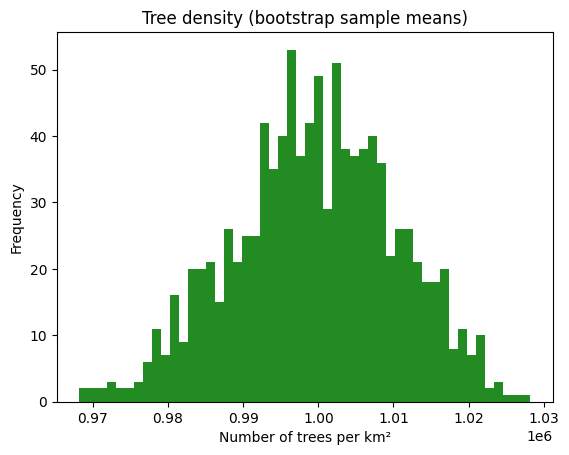

In [19]:
def bootstrap(p_mean=1000000, p_std=200000, num_iter=5000, sample_size=200):
    """
    Creates bootstrap samples from a distribution representing tree density in a forest.

    :param p_mean: Population mean tree density (trees/km²). Type = int, float
    :param p_std: Population standard deviation of tree density. Type = int, float
    :param num_iter: Number of bootstrap iterations. Type = int
    :param sample_size: Size of a single bootstrap sample. Type = int
    :return: Histogram of bootstrap sample means.
    """

    # Setting a seed to restore the random numbers later
    random.seed(42)

    # Generate (normally distributed) data for the population
    p_n = 30000  # Population size
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std = []

    # Loop for bootstrap iterations
    for i in range(num_iter):
        samp = random.sample(pop.tolist(), sample_size)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and standard deviation of the bootstrap sample means
    print(f'Bootstrap mean of sample means: {np.mean(sample_mean):,.0f}')
    print(f'Bootstrap mean of sample standard deviations: {np.mean(sample_std):,.0f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins=50, color='forestgreen')
    plt.title('Tree density (bootstrap sample means)', fontsize=12)
    plt.xlabel('Number of trees per km²')
    plt.ylabel('Frequency')
    plt.show()

# Function call
bootstrap(p_mean=1000000, p_std=200000, num_iter=1000, sample_size=350)


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-15 18:34:53
Python Version: 3.11.10
-----------------------------------
